# Twitter Scraping

In [1]:
# Import packages
!pip3 install tweepy
import os
import tweepy
import pandas as pd

In [2]:
# Twitter API
auth = tweepy.auth.OAuthHandler('NrOMwvHyzNiq2jVcTzRuQUKjL', 'Ro12C8tnliSvovYBJuAKe4K6lHyTZHjLqgHOVRggPTdj5jWMOk')
auth.set_access_token('1594985761-CPMAL7hesmEYbQFsBtkVFAYOXY1tu15FOE37Nz7', '7An1v3g0heKjmPx1QZd2p10FjsMApV13cFQzMlPNSaVUy')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
def get_tweets(search_words):
    new_search = search_words + ' -filter:retweets'
    num_of_tweets = 5000

    # start keyword search 
    tweets = tweepy.Cursor(api.search_tweets,
                           q=new_search,
                           lang='en').items(num_of_tweets)

    # Collect a list of tweets
    tweet_text = [tweet.text.encode('utf-8') for tweet in tweets]
    
    # create a dataframe with column names
    tweet_df = pd.DataFrame(data=tweet_text, columns=['Tweet'])
    
    # save the tweet info dataframe to csv
    tweet_df.to_csv(search_words+'_tweets.csv')

### The code block below runs a very long time (more than an hour) because of Twitter API rate limits
### For checking Text Mining code and Sentimental Analysis code, please use the csv files directly !!!

In [12]:
# American Airlines, Spirit Airlines, JetBlue, United Airlines, Delta Air Lines, Alaska Airlines, Sun Country Airlines
get_tweets('American Airlines')
get_tweets('Spirit Airlines')
get_tweets('JetBlue')
get_tweets('United Airlines')
get_tweets('Alaska Airlines')
get_tweets('Sun Country Airlines')

In [5]:
get_tweets('Delta Airlines')

Rate limit reached. Sleeping for: 801


# Text Mining

In [6]:
# Import packages
!pip install nltk
import nltk
nltk.download()
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [11]:
# function for processing the 'Tweet' column of the dataframe
def get_tokens(doc):
    
    # case normalization 
    doc = doc.lower()
    
    # tokenization 
    tokens = nltk.word_tokenize(doc)
    
    # non-word token removal 
    tokens2 = [token for token in tokens if token.isalpha()]

    # stopwords removal 
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords += ["br", "href", "http", "https", "b", "amp", "intl", "et", "ne", "l", "int", 
                  "airlines", "airline", "flights", "flight", "spotted", "feet"]
    tokens3 = [token for token in tokens2 if token not in stopwords]
    
    return tokens3

In [8]:
# read csv file
df_AA = pd.read_csv('American Airlines_tweets.csv')
df_Spirit = pd.read_csv('Spirit Airlines_tweets.csv')
df_JetBlue = pd.read_csv('JetBlue_tweets.csv')
df_UA = pd.read_csv('United Airlines_tweets.csv')
df_Delta = pd.read_csv('Delta Airlines_tweets.csv')
df_Alaska = pd.read_csv('Alaska Airlines_tweets.csv')
df_Sun = pd.read_csv('Sun Country Airlines_tweets.csv')

In [12]:
# function for getting the word frequency graph
def get_word_freq(df):
    # apply the get_tokens function to the text columns
    df['tweet_tokens'] = df['Tweet'].apply(get_tokens)
    
    ## frequency distribution
    # generate a list that contains all the tokens of entire corpus
    all_tweet_tokens = []
    for lst in df["tweet_tokens"].tolist():
        all_tweet_tokens += lst

    # generate a frequency dictionary for all the tokens 
    freq_summary = nltk.FreqDist(all_tweet_tokens)

    #sort the frequency list in descending order
    sorted_freq_summary = sorted(freq_summary.items(),key = lambda k:k[1], reverse = True)

    # print(sorted_freq_summary)
    freq_summary.plot(30)

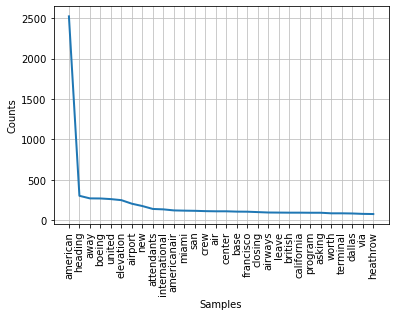

In [13]:
# American Airlines
get_word_freq(df_AA)

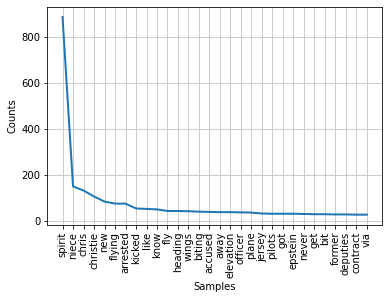

In [14]:
# Spirit Airlines
get_word_freq(df_Spirit)

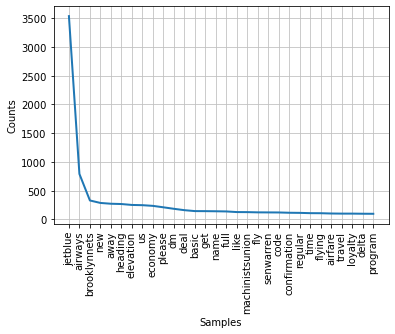

In [15]:
# JetBlue
get_word_freq(df_JetBlue)

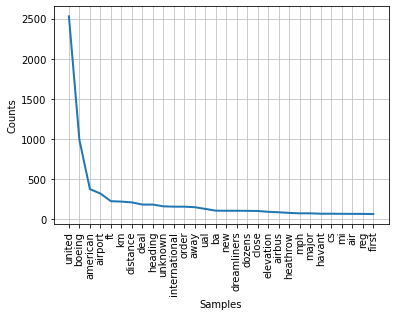

In [16]:
# United Airlines
get_word_freq(df_UA)

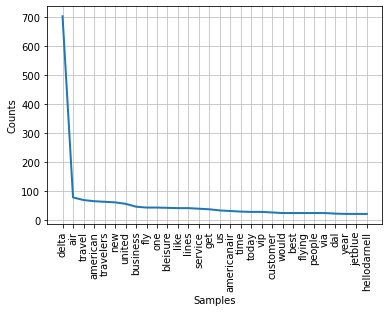

In [17]:
# Delta Air Lines
get_word_freq(df_Delta)

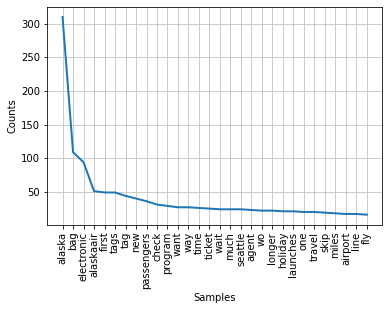

In [18]:
# Alaska Airlines
get_word_freq(df_Alaska)

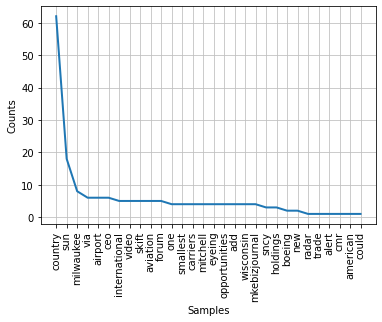

In [19]:
# Sun Country Airlines
get_word_freq(df_Sun)

# Sentiment Analysis

In [20]:
# import packages
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [23]:
# function for genertating sentitment score
def gen_sentiment(doc):
    score = sia.polarity_scores(doc)["compound"]
    return score

def get_avg_sentiment_score(df):
    df['sentiment_score'] = df["Tweet"].apply(gen_sentiment)
    # remove rows with sentiment score of 0
    df2 = df[df.sentiment_score != 0]
    return df2['sentiment_score'].mean()

In [24]:
# print sentiment coumpund score for each airline
print('AA:', get_avg_sentiment_score(df_AA))
print('Spirit:', get_avg_sentiment_score(df_Spirit))
print('JetBlue:', get_avg_sentiment_score(df_JetBlue))
print('UA:', get_avg_sentiment_score(df_UA))
print('Delta:', get_avg_sentiment_score(df_Delta))
print('Alaska:', get_avg_sentiment_score(df_Alaska))
print('Sun:', get_avg_sentiment_score(df_Sun))

AA: 0.13110702247191025
Spirit: 0.09865316326530586
JetBlue: 0.14255309060118515
UA: 0.34628624999999763
Delta: 0.16107371794871758
Alaska: 0.26591388888888834
Sun: 0.28352222222222223


# Word Cloud

In [25]:
# import packages
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# split positive tweets and negative tweets into 2 dataframes for further word cloud generation
def get_attitude(df):
    pos = df[df["sentiment_score"] > 0]
    neg = df[df["sentiment_score"] <= 0]
    return pos, neg

In [27]:
# function that take dataframe as input, then generate word cloud 
def gen_wordcloud_df(df, token_col):
    all_tokens = []
    for lst in df[token_col].tolist():
        all_tokens += lst
    words = " ".join(all_tokens)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(words)                     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

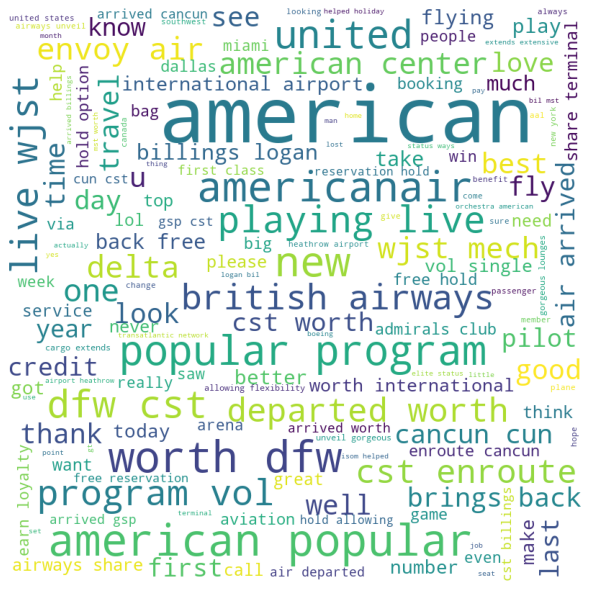

In [28]:
# American Airlines - positive
gen_wordcloud_df(get_attitude(df_AA)[0], 'tweet_tokens')

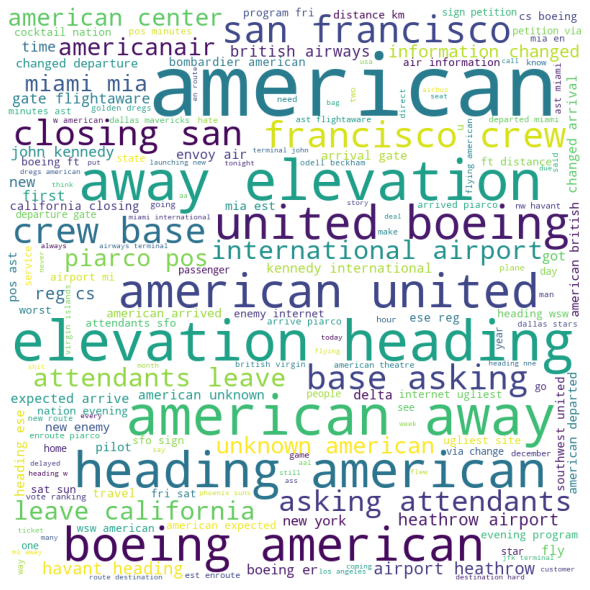

In [29]:
# American Airlines - negative
gen_wordcloud_df(get_attitude(df_AA)[1], 'tweet_tokens')

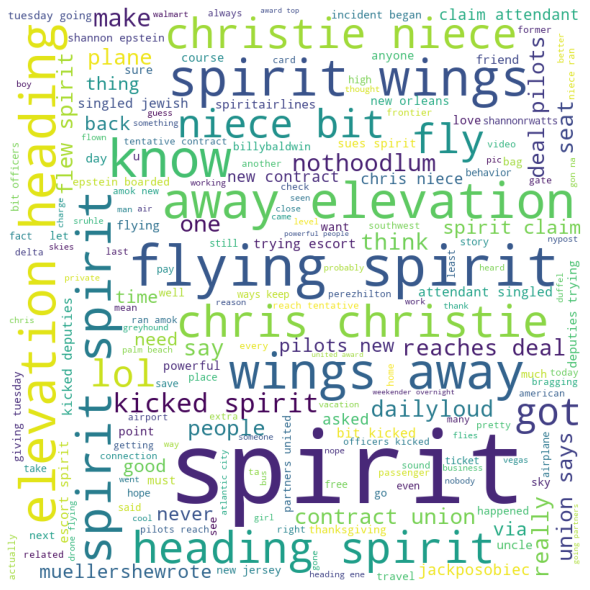

In [30]:
# Spirit Airlines - positive
gen_wordcloud_df(get_attitude(df_Spirit)[0], 'tweet_tokens')

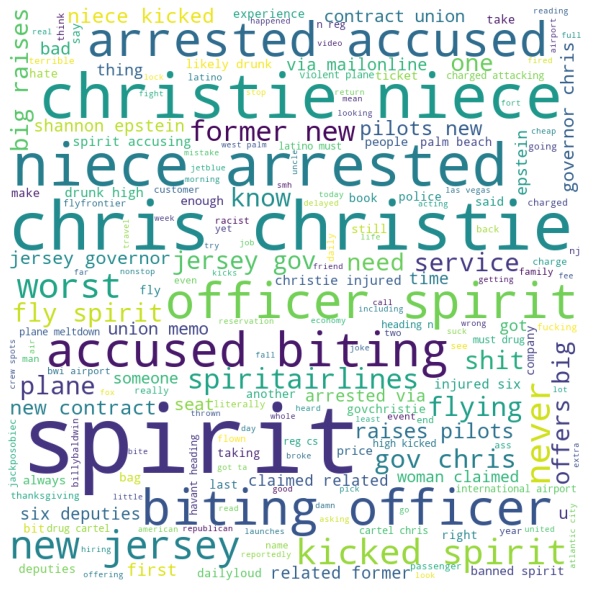

In [31]:
# Spirit Airlines - negative
gen_wordcloud_df(get_attitude(df_Spirit)[1], 'tweet_tokens')

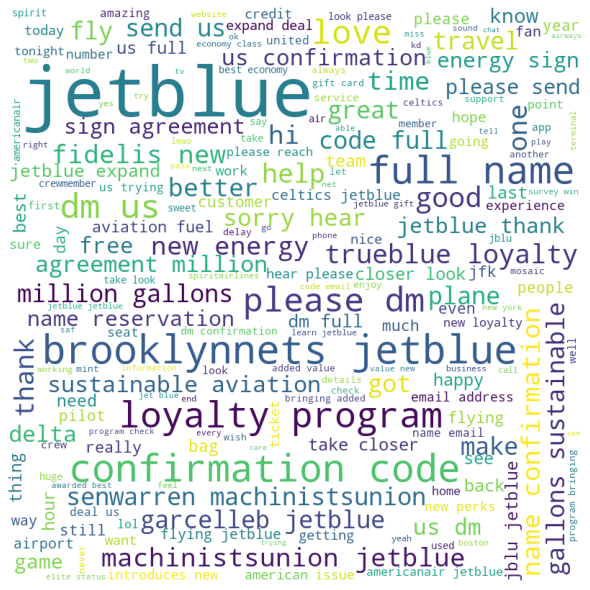

In [32]:
# JetBlue - positive
gen_wordcloud_df(get_attitude(df_JetBlue)[0], 'tweet_tokens')

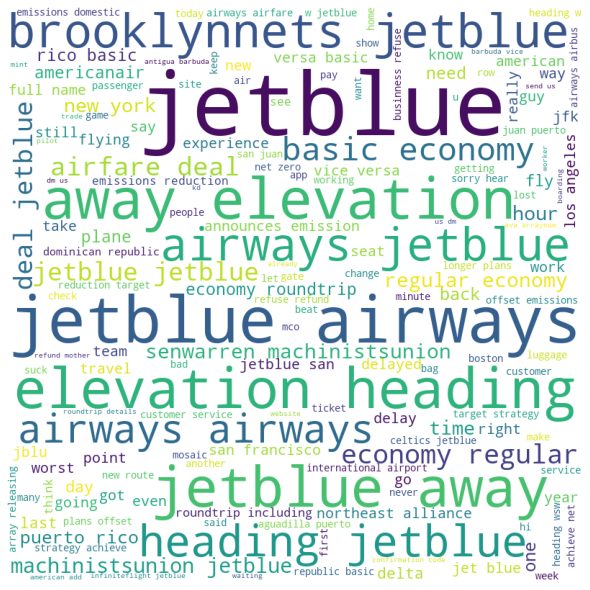

In [33]:
# JetBlue - negative
gen_wordcloud_df(get_attitude(df_JetBlue)[1], 'tweet_tokens')

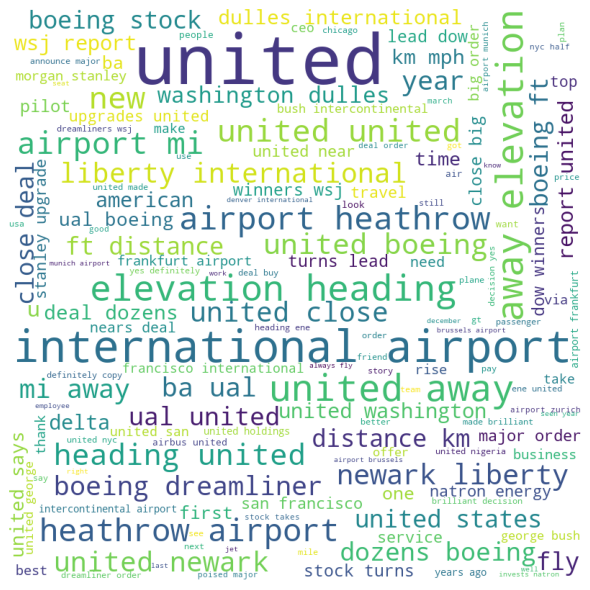

In [34]:
# United Airlines - positive
gen_wordcloud_df(get_attitude(df_UA)[0], 'tweet_tokens')

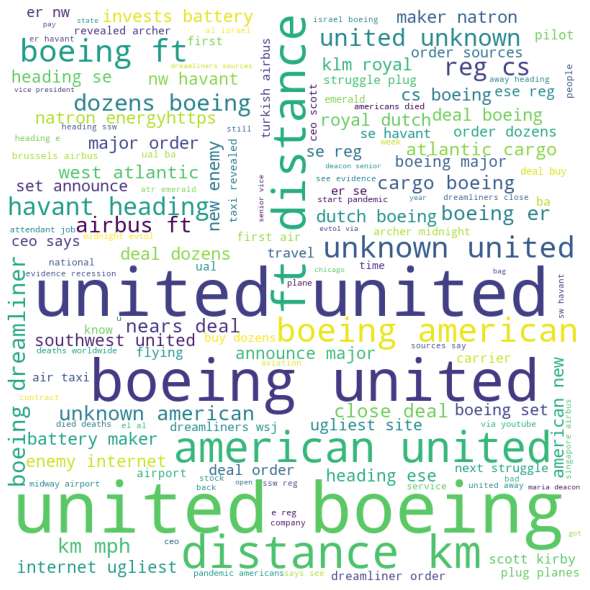

In [35]:
# United Airlines - negative
gen_wordcloud_df(get_attitude(df_UA)[1], 'tweet_tokens')

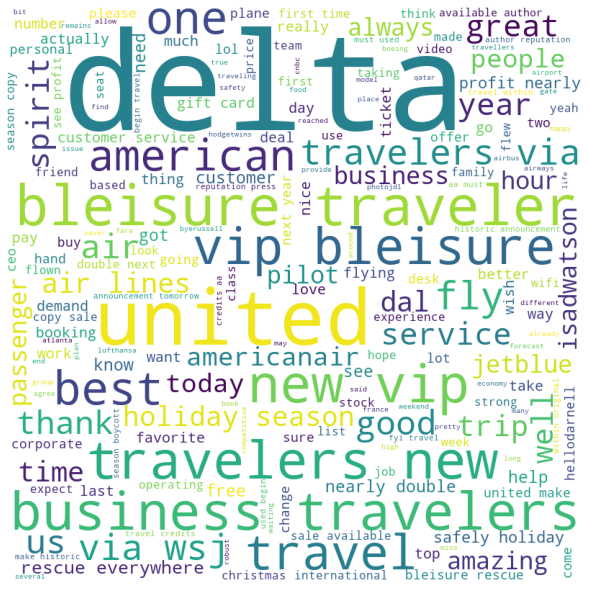

In [36]:
# Delta Air Lines - positive
gen_wordcloud_df(get_attitude(df_Delta)[0], 'tweet_tokens')

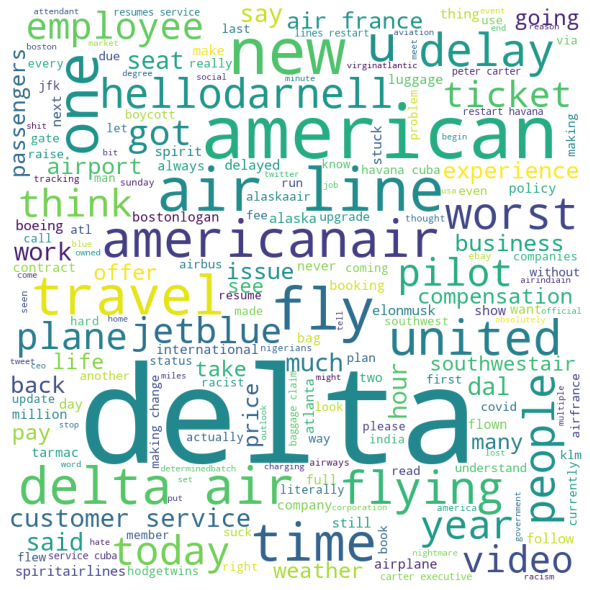

In [37]:
# Delta Air Lines - negative
gen_wordcloud_df(get_attitude(df_Delta)[1], 'tweet_tokens')

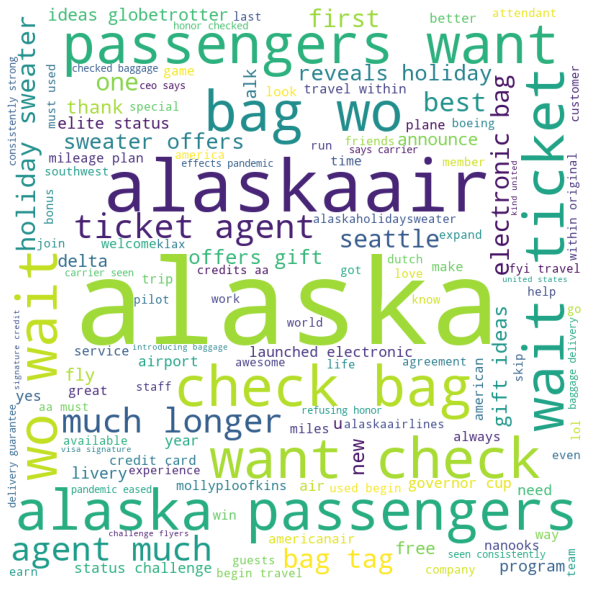

In [38]:
# Alaska Airlines - positive
gen_wordcloud_df(get_attitude(df_Alaska)[0], 'tweet_tokens')

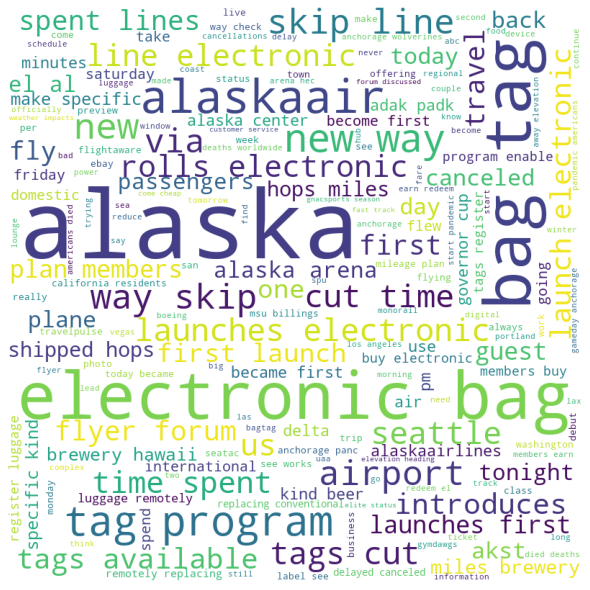

In [39]:
# Alaska Airlines - negative
gen_wordcloud_df(get_attitude(df_Alaska)[1], 'tweet_tokens')

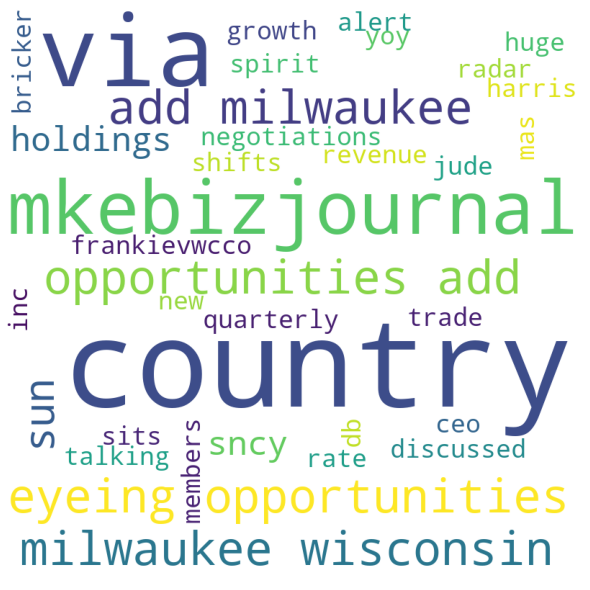

In [40]:
# Sun Country Airlines - positive
gen_wordcloud_df(get_attitude(df_Sun)[0], 'tweet_tokens')

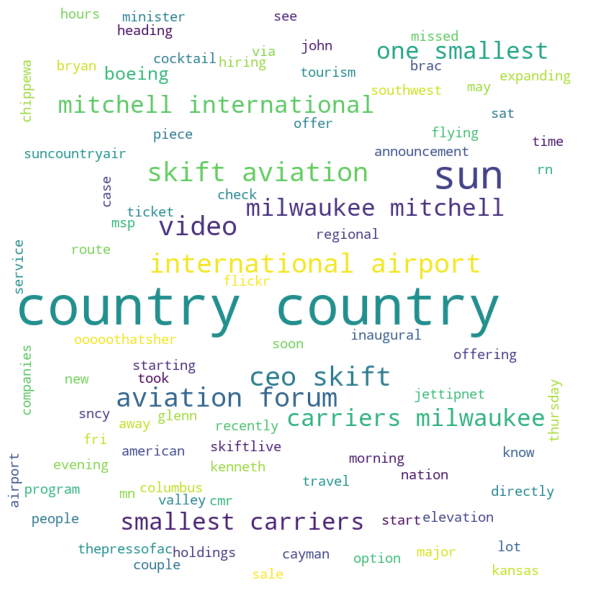

In [41]:
# Sun Country Airlines - negative
gen_wordcloud_df(get_attitude(df_Sun)[1], 'tweet_tokens')